# BELLABEAT CASO DE ESTUDIO.

## Introducción

<ul>
    <li>
Bellabeat es una empresa pequeña y exitosa, que fabrica productos de alta tecnología orientados a la salud de la mujer. </li>
<BR>
<li>Sus productos son:</li>

Aplicación Bellabeat: proporciona a los usuarios datos de salud relacionados con su actividad física, sueño, estrés, ciclo menstrual y hábitos de conciencia plena. La aplicación se conecta a su línea de productos de bienestar inteligentes.

Leaf: Dispositivo de seguimiento clásico, se puede usar como pulsera, collar o clip. El dispositivo Leaf se conecta a la aplicación para hacer un seguimiento de la actividad física, el sueño y el estrés.

Time: Este reloj de bienestar combina el aspecto intemporal de un reloj clásico con la tecnología inteligente, hace el seguimiento de la actividad física, el sueño y el estrés del usuario. El reloj Time se conecta a la aplicación para proporcionar información sobre el bienestar diario.

Spring: Botella de agua que hace el seguimiento diario del consumo de agua mediante el uso de tecnología inteligente para garantizar la hidratación adecuada a lo largo del día. La botella Spring se conecta a la aplicación para hacer el seguimiento de los niveles de hidratación.

</ul>



### Objetivo

<ul>
<li>
Bellabeat está buscando nuevas oportunidades de negocio para su crecimiento. Por lo cual pidió analizar información de dispositivos inteligentes y el uso que se les da para orientar una estrategia de marketing orientada al análisis de datos.</li>
    <br>

<li>Interesados:
    Su cofundadora y directora Urška Sršen y Sando Mur cofundador y miembro clave de Bellabeat.</li>
<br>

<li>Datos de seguimiento de actividad física de Fitbit (CC0: Dominio público, conjunto de datos disponibles a través de Mobius): Este conjunto de datos de Kaggle contiene el seguimiento de la actividad física personal en treinta usuarios de Fitbit</li>
</ul>


# Preparar

<ul>
<li>Se utilizó el lenguage de programacion  R para realizar las siguientes acciones.</li>

<li>Se utilizaron las siguientes librerías:</li>
</ul>    

In [3]:
library(dplyr)
library(lubridate)
library(parsedate)
library(ggplot2)
library(ggExtra)
library(tidyr)

<ul>
<li>Se comenzó descargando  los archivos en formato csv y después fueron exportados como dataframes.</li>

<li>Se utilizaron los siguientes dataframes ya se concluyó que contenían mayor importancia. </li>
</ul>


In [4]:
daily_activity <- read.csv("dailyActivity_merged.csv")
daily_calories <- read.csv("dailyCalories_merged.csv")
daily_intensities <- read.csv("dailyIntensities_merged.csv")
daily_steps <- read.csv("dailySteps_merged.csv")
heartrate_seconds <- read.csv("heartrate_seconds_merged.csv")
sleep_day <- read.csv("sleepDay_merged.csv")
weightLogInfo <- read.csv("weightLogInfo_merged.csv")

<ul>
<li>Se revisó la estructura que tiene cada dataframe</li>
</ul>

In [5]:
str(daily_activity)

'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

In [6]:
str(daily_calories)

'data.frame':	940 obs. of  3 variables:
 $ Id         : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDay: chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ Calories   : int  1985 1797 1776 1745 1863 1728 1921 2035 1786 1775 ...


In [7]:
str(daily_intensities)

'data.frame':	940 obs. of  10 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDay             : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 1149 775 818 838 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...


In [8]:
str(daily_steps)

'data.frame':	940 obs. of  3 variables:
 $ Id         : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDay: chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ StepTotal  : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...


In [9]:
str(heartrate_seconds)

'data.frame':	2483658 obs. of  3 variables:
 $ Id   : num  2.02e+09 2.02e+09 2.02e+09 2.02e+09 2.02e+09 ...
 $ Time : chr  "4/12/2016 7:21:00 AM" "4/12/2016 7:21:05 AM" "4/12/2016 7:21:10 AM" "4/12/2016 7:21:20 AM" ...
 $ Value: int  97 102 105 103 101 95 91 93 94 93 ...


In [10]:
str(sleep_day)

'data.frame':	413 obs. of  5 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr  "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : int  346 407 442 367 712 320 377 364 384 449 ...


In [13]:
str(weightLogInfo)

'data.frame':	67 obs. of  8 variables:
 $ Id            : num  1.50e+09 1.50e+09 1.93e+09 2.87e+09 2.87e+09 ...
 $ Date          : chr  "5/2/2016 11:59:59 PM" "5/3/2016 11:59:59 PM" "4/13/2016 1:08:52 AM" "4/21/2016 11:59:59 PM" ...
 $ WeightKg      : num  52.6 52.6 133.5 56.7 57.3 ...
 $ WeightPounds  : num  116 116 294 125 126 ...
 $ Fat           : int  22 NA NA NA NA 25 NA NA NA NA ...
 $ BMI           : num  22.6 22.6 47.5 21.5 21.7 ...
 $ IsManualReport: chr  "True" "True" "False" "True" ...
 $ LogId         : num  1.46e+12 1.46e+12 1.46e+12 1.46e+12 1.46e+12 ...


<ul>
<li> Se Observaron los datos </li>
</ul>

In [65]:
head(daily_activity)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,04 12 16,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,04 13 16,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,04 14 16,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,04 15 16,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,04 16 16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,04 17 16,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [129]:
head(daily_calories)


,id_date,Id,ActivityDay,Calories
,<chr>,<dbl>,<chr>,<int>
1,1503960366 04 12 16,1503960366,04 12 16,1985
2,1503960366 04 13 16,1503960366,04 13 16,1797
3,1503960366 04 14 16,1503960366,04 14 16,1776
4,1503960366 04 15 16,1503960366,04 15 16,1745
5,1503960366 04 16 16,1503960366,04 16 16,1863
6,1503960366 04 17 16,1503960366,04 17 16,1728


In [130]:
head(daily_intensities)


,id_date,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
,<chr>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366 04 12 16,1503960366,04 12 16,728,328,13,25,0,6.06,0.55,1.88
2,1503960366 04 13 16,1503960366,04 13 16,776,217,19,21,0,4.71,0.69,1.57
3,1503960366 04 14 16,1503960366,04 14 16,1218,181,11,30,0,3.91,0.40,2.44
4,1503960366 04 15 16,1503960366,04 15 16,726,209,34,29,0,2.83,1.26,2.14
5,1503960366 04 16 16,1503960366,04 16 16,773,221,10,36,0,5.04,0.41,2.71
6,1503960366 04 17 16,1503960366,04 17 16,539,164,20,38,0,2.51,0.78,3.19


In [68]:
head(daily_steps)


,Id,ActivityDay,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,04 12 16,13162
2,1503960366,04 13 16,10735
3,1503960366,04 14 16,10460
4,1503960366,04 15 16,9762
5,1503960366,04 16 16,12669
6,1503960366,04 17 16,9705


In [132]:
#head(heartrate_seconds)
heartrate_seconds

Id,Time,Value,Time2,date2
<dbl>,<dttm>,<int>,<chr>,<chr>
2022484408,2016-04-12 07:21:00,97,07:21:00:AM,04:12:16
2022484408,2016-04-12 07:21:05,102,07:21:05:AM,04:12:16
2022484408,2016-04-12 07:21:10,105,07:21:10:AM,04:12:16
2022484408,2016-04-12 07:21:20,103,07:21:20:AM,04:12:16
2022484408,2016-04-12 07:21:25,101,07:21:25:AM,04:12:16
2022484408,2016-04-12 07:22:05,95,07:22:05:AM,04:12:16
2022484408,2016-04-12 07:22:10,91,07:22:10:AM,04:12:16
2022484408,2016-04-12 07:22:15,93,07:22:15:AM,04:12:16
2022484408,2016-04-12 07:22:20,94,07:22:20:AM,04:12:16


In [70]:
head(sleep_day)


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,time2,date2
,<dbl>,<dttm>,<int>,<int>,<int>,<chr>,<chr>
1,1503960366,2016-04-12 12:00:00,1,327,346,12:00:00,04:12:16
2,1503960366,2016-04-13 12:00:00,2,384,407,12:00:00,04:13:16
3,1503960366,2016-04-15 12:00:00,1,412,442,12:00:00,04:15:16
4,1503960366,2016-04-16 12:00:00,2,340,367,12:00:00,04:16:16
5,1503960366,2016-04-17 12:00:00,1,700,712,12:00:00,04:17:16
6,1503960366,2016-04-19 12:00:00,1,304,320,12:00:00,04:19:16


In [71]:
head(weightLogInfo)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,Time2,date2
,<dbl>,<dttm>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,1503960366,2016-05-02 23:59:59,52.6,115.9631,22,22.65,True,1.462234e+12,23:59:59:PM,05:02:16
2,1503960366,2016-05-03 23:59:59,52.6,115.9631,NA,22.65,True,1.462320e+12,23:59:59:PM,05:03:16
3,1927972279,2016-04-13 01:08:52,133.5,294.3171,NA,47.54,False,1.460510e+12,01:08:52:AM,04:13:16
4,2873212765,2016-04-21 23:59:59,56.7,125.0021,NA,21.45,True,1.461283e+12,23:59:59:PM,04:21:16
5,2873212765,2016-05-12 23:59:59,57.3,126.3249,NA,21.69,True,1.463098e+12,23:59:59:PM,05:12:16
6,4319703577,2016-04-17 23:59:59,72.4,159.6147,25,27.45,True,1.460938e+12,23:59:59:PM,04:17:16


# Procesar

<ul>
    <li>
Se modificó el formato de la columna de la fecha ya que esta estaba representada como char, se separaron la fecha y la hora  en columnas diferentes y con un formato especifico (Mes, Día, Año).</li>
    </ul>


In [14]:
daily_activity$ActivityDate=format(parse_date(daily_activity$ActivityDate), '%m %d %y')

daily_calories$ActivityDay=format(parse_date(daily_calories$ActivityDay), '%m %d %y')

daily_intensities $ActivityDay=format(parse_date(daily_intensities$ActivityDay), '%m %d %y')

daily_steps$ActivityDay=format(parse_date(daily_steps$ActivityDay), '%m %d %y')

In [15]:
heartrate_seconds$Time <- mdy_hms(heartrate_seconds$Time)
heartrate_seconds$Time2 <- format(as.POSIXct(heartrate_seconds$Time),format = "%H:%M:%S:%p")
heartrate_seconds$date2 <- format(as.POSIXct(heartrate_seconds$Time),format = "%m:%d:%y")

sleep_day$SleepDay<- ymd_hms(as.POSIXct(sleep_day$SleepDay, format="%m/%d/%Y %H:%M:%S "))
sleep_day$time2 <- format(as.POSIXct(sleep_day$SleepDay),format = "%H:%M:%S")
sleep_day$date2 <- format(as.POSIXct(sleep_day$SleepDay),format = "%m:%d:%y")

weightLogInfo$Date <- mdy_hms(weightLogInfo$Date)
weightLogInfo$Time2 <- format(as.POSIXct(weightLogInfo$Date),format = "%H:%M:%S:%p")
weightLogInfo$date2 <- format(as.POSIXct(weightLogInfo$Date),format = "%m:%d:%y")
  

<ul>
<li>Cambiar nombre de columna para combinar los dataframes</li>
</ul>

In [75]:
daily_activity %>% 
rename (date = ActivityDate)

Id,date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1503960366,04 12 16,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,04 13 16,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,04 14 16,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,04 15 16,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,04 16 16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,04 17 16,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
1503960366,04 18 16,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921
1503960366,04 19 16,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035
1503960366,04 20 16,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786


In [202]:
daily_calories %>% 
 rename (date = ActivityDay) 

id_date,Id,date,Calories
<chr>,<dbl>,<chr>,<int>
1503960366 04 12 16,1503960366,04 12 16,1985
1503960366 04 13 16,1503960366,04 13 16,1797
1503960366 04 14 16,1503960366,04 14 16,1776
1503960366 04 15 16,1503960366,04 15 16,1745
1503960366 04 16 16,1503960366,04 16 16,1863
1503960366 04 17 16,1503960366,04 17 16,1728
1503960366 04 18 16,1503960366,04 18 16,1921
1503960366 04 19 16,1503960366,04 19 16,2035
1503960366 04 20 16,1503960366,04 20 16,1786


In [147]:
weightLogInfo <- weightLogInfo %>% 
rename (date = date2)

<ul>
<li> Se reviso el numero columnas vacias, nulas en los dataframes y el numero de id.</li>
</ul>

In [16]:
print(sapply(daily_activity, function(x) sum(is.na(x))))
data.frame(length(table(daily_activity$Id)))
print( colSums(daily_activity == 0))

                      Id             ActivityDate               TotalSteps 
                       0                        0                        0 
           TotalDistance          TrackerDistance LoggedActivitiesDistance 
                       0                        0                        0 
      VeryActiveDistance ModeratelyActiveDistance      LightActiveDistance 
                       0                        0                        0 
 SedentaryActiveDistance        VeryActiveMinutes      FairlyActiveMinutes 
                       0                        0                        0 
    LightlyActiveMinutes         SedentaryMinutes                 Calories 
                       0                        0                        0 


length.table.daily_activity.Id..
<int>
33


                      Id             ActivityDate               TotalSteps 
                       0                        0                       77 
           TotalDistance          TrackerDistance LoggedActivitiesDistance 
                      78                       78                      908 
      VeryActiveDistance ModeratelyActiveDistance      LightActiveDistance 
                     413                      386                       85 
 SedentaryActiveDistance        VeryActiveMinutes      FairlyActiveMinutes 
                     858                      409                      384 
    LightlyActiveMinutes         SedentaryMinutes                 Calories 
                      84                        1                        4 


In [17]:
print(sapply(daily_calories, function(x) sum(is.na(x))))
data.frame(length(table(daily_calories$Id)))             
print(cols<-colSums(daily_calories == 0)) 

         Id ActivityDay    Calories 
          0           0           0 


length.table.daily_calories.Id..
<int>
33


         Id ActivityDay    Calories 
          0           0           4 


In [18]:
print(sapply(daily_intensities, function(x) sum(is.na(x))))
data.frame(length(table(daily_intensities$Id)))             
print(cols<-colSums(daily_intensities == 0)) 

                      Id              ActivityDay         SedentaryMinutes 
                       0                        0                        0 
    LightlyActiveMinutes      FairlyActiveMinutes        VeryActiveMinutes 
                       0                        0                        0 
 SedentaryActiveDistance      LightActiveDistance ModeratelyActiveDistance 
                       0                        0                        0 
      VeryActiveDistance 
                       0 


length.table.daily_intensities.Id..
<int>
33


                      Id              ActivityDay         SedentaryMinutes 
                       0                        0                        1 
    LightlyActiveMinutes      FairlyActiveMinutes        VeryActiveMinutes 
                      84                      384                      409 
 SedentaryActiveDistance      LightActiveDistance ModeratelyActiveDistance 
                     858                       85                      386 
      VeryActiveDistance 
                     413 


In [19]:
print(sapply(daily_steps, function(x) sum(is.na(x))))
data.frame(length(table(daily_steps$Id)))             
print(cols<-colSums(daily_steps == 0)) 

         Id ActivityDay   StepTotal 
          0           0           0 


length.table.daily_steps.Id..
<int>
33


         Id ActivityDay   StepTotal 
          0           0          77 


In [20]:
print(sapply(heartrate_seconds, function(x) sum(is.na(x))))
data.frame(length(table(heartrate_seconds$Id)))             
print(cols<-colSums(heartrate_seconds == 0)) 

   Id  Time Value Time2 date2 
    0     0     0     0     0 


length.table.heartrate_seconds.Id..
<int>
14


   Id  Time Value Time2 date2 
    0     0     0     0     0 


In [21]:
print(sapply(sleep_day, function(x) sum(is.na(x))))
data.frame(length(table(sleep_day$Id)))             
print(cols<-colSums(sleep_day == 0))

                Id           SleepDay  TotalSleepRecords TotalMinutesAsleep 
                 0                  0                  0                  0 
    TotalTimeInBed              time2              date2 
                 0                  0                  0 


length.table.sleep_day.Id..
<int>
24


                Id           SleepDay  TotalSleepRecords TotalMinutesAsleep 
                 0                  0                  0                  0 
    TotalTimeInBed              time2              date2 
                 0                  0                  0 


In [22]:
print(sapply(weightLogInfo, function(x) sum(is.na(x))))
data.frame(length(table(weightLogInfo$Id)))
print(cols<-colSums(weightLogInfo == 0)) 

            Id           Date       WeightKg   WeightPounds            Fat 
             0              0              0              0             65 
           BMI IsManualReport          LogId          Time2          date2 
             0              0              0              0              0 


length.table.weightLogInfo.Id..
<int>
8


            Id           Date       WeightKg   WeightPounds            Fat 
             0              0              0              0             NA 
           BMI IsManualReport          LogId          Time2          date2 
             0              0              0              0              0 


<ul>
<li>Se seleccionaron las columnas mas relevantes en el análisis para poder analizarlas, se les aplico una función llamada summary que proporciona un resumen de medidas de ajuste de modelos.</li>
</ul>



In [25]:
daily_activity %>% 
 drop_na()%>% 
 select(TotalSteps, TotalDistance,
        VeryActiveMinutes, FairlyActiveMinutes, 
        LightlyActiveMinutes,
       SedentaryMinutes, Calories)%>%
summary()

   TotalSteps    TotalDistance    VeryActiveMinutes FairlyActiveMinutes
 Min.   :    0   Min.   : 0.000   Min.   :  0.00    Min.   :  0.00     
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.:  0.00    1st Qu.:  0.00     
 Median : 7406   Median : 5.245   Median :  4.00    Median :  6.00     
 Mean   : 7638   Mean   : 5.490   Mean   : 21.16    Mean   : 13.56     
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.: 32.00    3rd Qu.: 19.00     
 Max.   :36019   Max.   :28.030   Max.   :210.00    Max.   :143.00     
 LightlyActiveMinutes SedentaryMinutes    Calories   
 Min.   :  0.0        Min.   :   0.0   Min.   :   0  
 1st Qu.:127.0        1st Qu.: 729.8   1st Qu.:1828  
 Median :199.0        Median :1057.5   Median :2134  
 Mean   :192.8        Mean   : 991.2   Mean   :2304  
 3rd Qu.:264.0        3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :518.0        Max.   :1440.0   Max.   :4900  

In [24]:
daily_calories %>% 
 drop_na()%>% 
 select( Calories)%>%
summary()

    Calories   
 Min.   :   0  
 1st Qu.:1828  
 Median :2134  
 Mean   :2304  
 3rd Qu.:2793  
 Max.   :4900  

In [26]:
daily_intensities %>% 
 drop_na()%>% 
 select(SedentaryMinutes,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance )%>%
summary()

 SedentaryMinutes LightActiveDistance ModeratelyActiveDistance
 Min.   :   0.0   Min.   : 0.000      Min.   :0.0000          
 1st Qu.: 729.8   1st Qu.: 1.945      1st Qu.:0.0000          
 Median :1057.5   Median : 3.365      Median :0.2400          
 Mean   : 991.2   Mean   : 3.341      Mean   :0.5675          
 3rd Qu.:1229.5   3rd Qu.: 4.782      3rd Qu.:0.8000          
 Max.   :1440.0   Max.   :10.710      Max.   :6.4800          
 VeryActiveDistance
 Min.   : 0.000    
 1st Qu.: 0.000    
 Median : 0.210    
 Mean   : 1.503    
 3rd Qu.: 2.053    
 Max.   :21.920    

In [27]:
daily_steps %>% 
 drop_na()%>% 
 select(StepTotal )%>%
summary()

   StepTotal    
 Min.   :    0  
 1st Qu.: 3790  
 Median : 7406  
 Mean   : 7638  
 3rd Qu.:10727  
 Max.   :36019  

In [28]:
#heartrate_seconds
heartrate_seconds %>% 
 drop_na()%>% 
 select(  Value   )%>%
summary()

     Value       
 Min.   : 36.00  
 1st Qu.: 63.00  
 Median : 73.00  
 Mean   : 77.33  
 3rd Qu.: 88.00  
 Max.   :203.00  

In [29]:
#sleep_day
sleep_day %>% 
 drop_na()%>% 
 select(  TotalSleepRecords, TotalMinutesAsleep,TotalTimeInBed )%>%
summary()

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

In [30]:
#weightLogInfo
weightLogInfo %>% 
 drop_na()%>% 
 select(  WeightKg, WeightPounds,Fat,BMI   )%>%
summary()

    WeightKg      WeightPounds        Fat             BMI       
 Min.   :52.60   Min.   :116.0   Min.   :22.00   Min.   :22.65  
 1st Qu.:57.55   1st Qu.:126.9   1st Qu.:22.75   1st Qu.:23.85  
 Median :62.50   Median :137.8   Median :23.50   Median :25.05  
 Mean   :62.50   Mean   :137.8   Mean   :23.50   Mean   :25.05  
 3rd Qu.:67.45   3rd Qu.:148.7   3rd Qu.:24.25   3rd Qu.:26.25  
 Max.   :72.40   Max.   :159.6   Max.   :25.00   Max.   :27.45  

<lu>
<li>
Se cambio el nombre de la columnas fecha para poder mezclar los dataframes.</li> 
</lu>

In [88]:
daily_activity <- daily_activity %>%
  unite("id_date", Id, ActivityDate,sep = " ", remove = FALSE) 

In [90]:
daily_calories <- daily_calories %>%
  unite("id_date", Id, ActivityDay,sep = " ", remove = FALSE) 

In [95]:
daily_intensities <- daily_intensities %>%
  unite("id_date", Id, ActivityDay,sep = " ", remove = FALSE) 

# Graficar

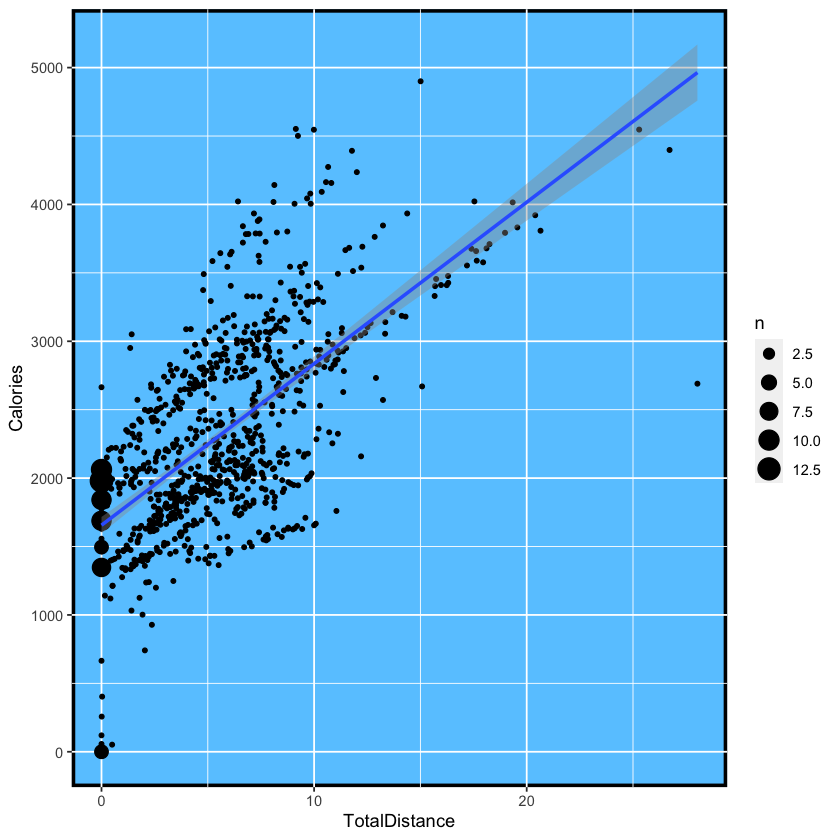

In [293]:
ggplot(daily_activity, aes(x=TotalDistance, y=Calories)) +geom_count() + geom_smooth(formula = y ~ x, method = "lm")+
theme(panel.background = element_rect(fill = "#67c9ff",color = 1,# Color del borde
                                    size = 2))

In [42]:
cor(daily_activity$Calories, daily_activity$TotalDistance)

[1] 0.6449619

In [211]:
dAdC <- merge(daily_activity, daily_calories, by=c('Id'))
head(dAdC)


,Id,id_date.x,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories.x,id_date.y,ActivityDay,Calories.y
,<dbl>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>
1,1503960366,1503960366 04 12 16,04 12 16,13162,8.5,8.5,0,1.88,0.55,6.06,0,25,13,328,728,1985,1503960366 04 12 16,04 12 16,1985
2,1503960366,1503960366 04 12 16,04 12 16,13162,8.5,8.5,0,1.88,0.55,6.06,0,25,13,328,728,1985,1503960366 04 13 16,04 13 16,1797
3,1503960366,1503960366 04 12 16,04 12 16,13162,8.5,8.5,0,1.88,0.55,6.06,0,25,13,328,728,1985,1503960366 04 14 16,04 14 16,1776
4,1503960366,1503960366 04 12 16,04 12 16,13162,8.5,8.5,0,1.88,0.55,6.06,0,25,13,328,728,1985,1503960366 04 15 16,04 15 16,1745
5,1503960366,1503960366 04 12 16,04 12 16,13162,8.5,8.5,0,1.88,0.55,6.06,0,25,13,328,728,1985,1503960366 04 16 16,04 16 16,1863
6,1503960366,1503960366 04 12 16,04 12 16,13162,8.5,8.5,0,1.88,0.55,6.06,0,25,13,328,728,1985,1503960366 04 17 16,04 17 16,1728


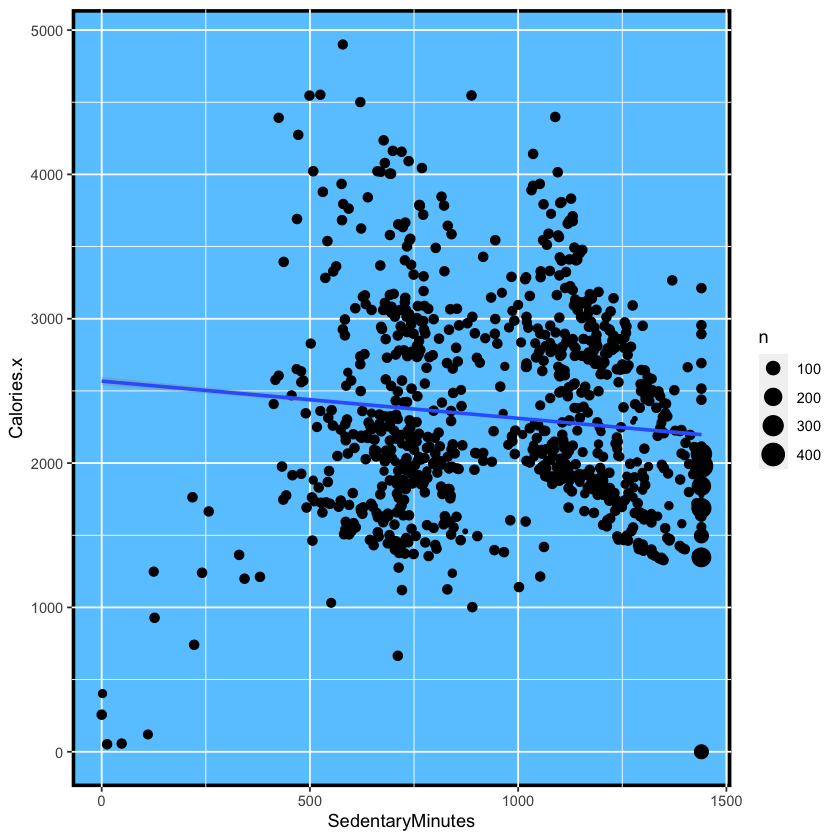

In [294]:
ggplot(dAdC, aes(x=SedentaryMinutes, y=Calories.x)) +geom_count() + geom_smooth(formula = y ~ x, method = "lm")+
theme(panel.background = element_rect(fill = "#67c9ff",color = 1,# Color del borde
                                    size = 2))

In [287]:
cor(dAdC$SedentaryMinutes, dAdC$Calories.x)

[1] -0.1071644

In [262]:
merged_data2 <- merge(daily_intensities, daily_calories, by=c('id_date'))
head(merged_data2)

,id_date,Id.x,ActivityDay.x,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,Id.y,ActivityDay.y,Calories
,<chr>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,1503960366 04 12 16,1503960366,04 12 16,728,328,13,25,0,6.06,0.55,1.88,1503960366,04 12 16,1985
2,1503960366 04 13 16,1503960366,04 13 16,776,217,19,21,0,4.71,0.69,1.57,1503960366,04 13 16,1797
3,1503960366 04 14 16,1503960366,04 14 16,1218,181,11,30,0,3.91,0.40,2.44,1503960366,04 14 16,1776
4,1503960366 04 15 16,1503960366,04 15 16,726,209,34,29,0,2.83,1.26,2.14,1503960366,04 15 16,1745
5,1503960366 04 16 16,1503960366,04 16 16,773,221,10,36,0,5.04,0.41,2.71,1503960366,04 16 16,1863
6,1503960366 04 17 16,1503960366,04 17 16,539,164,20,38,0,2.51,0.78,3.19,1503960366,04 17 16,1728


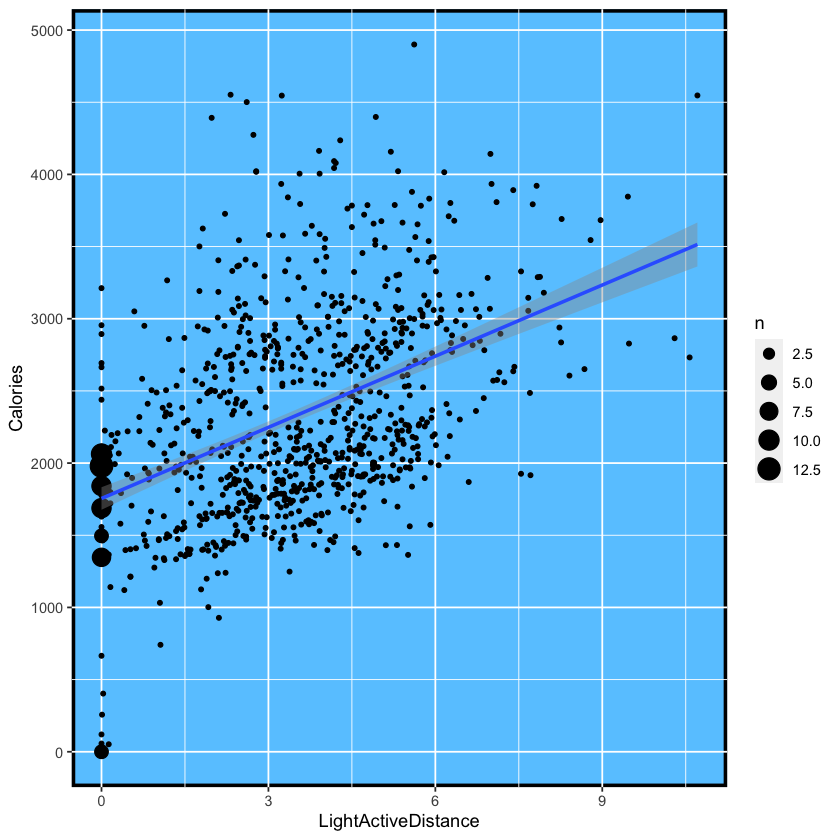

In [295]:
ggplot(merged_data2, aes(x=LightActiveDistance, y=Calories)) +geom_count() + geom_smooth(formula = y ~ x, method = "lm")+
theme(panel.background = element_rect(fill = "#67c9ff",color = 1,# Color del borde
                                    size = 2))

In [284]:
cor(merged_data2$LightActiveDistance, merged_data2$Calories)

[1] 0.4669168

In [338]:
timebed <- mean(sleep_day$TotalTimeInBed)

In [339]:
timebed

[1] 458.6392

In [337]:
cor(sleep_day$TotalMinutesAsleep, sleep_day$TotalTimeInBed)

[1] 0.9304575

In [333]:
meanAsleep <- mean((sleep_day$TotalTimeInBed - sleep_day$TotalMinutesAsleep))

In [334]:
meanAsleep

[1] 39.17191

In [341]:
asleep<- data.frame(
  "TotalinBed"=timebed,
    "TotalAsleep"=meanAsleep)

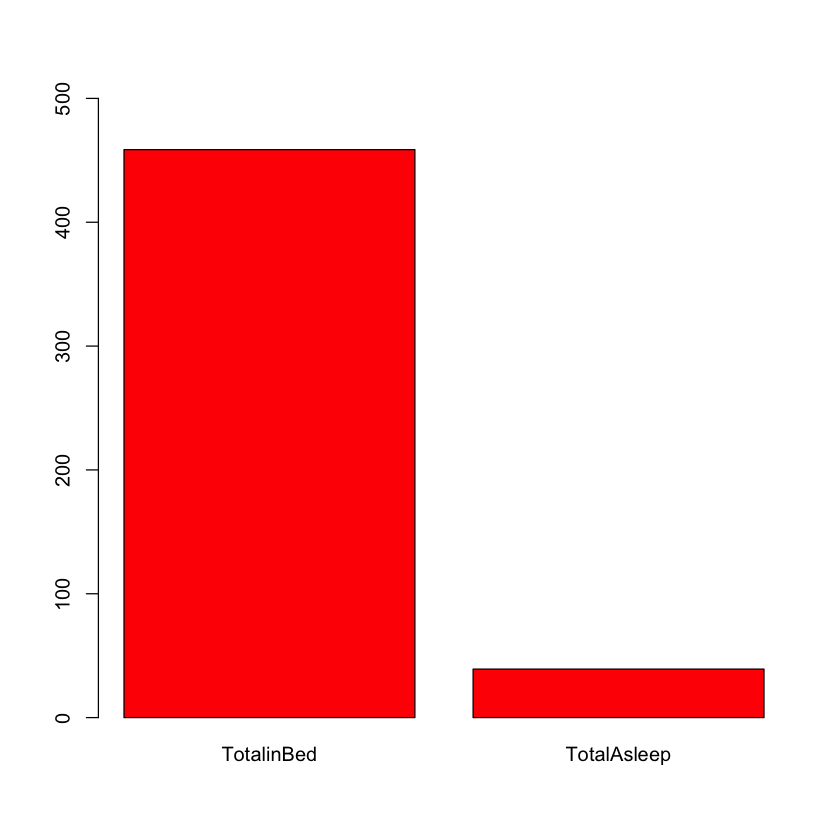

In [350]:
asleep %>%
as.matrix() %>%
barplot(col = heat.colors(1), ylim= c(0,500))

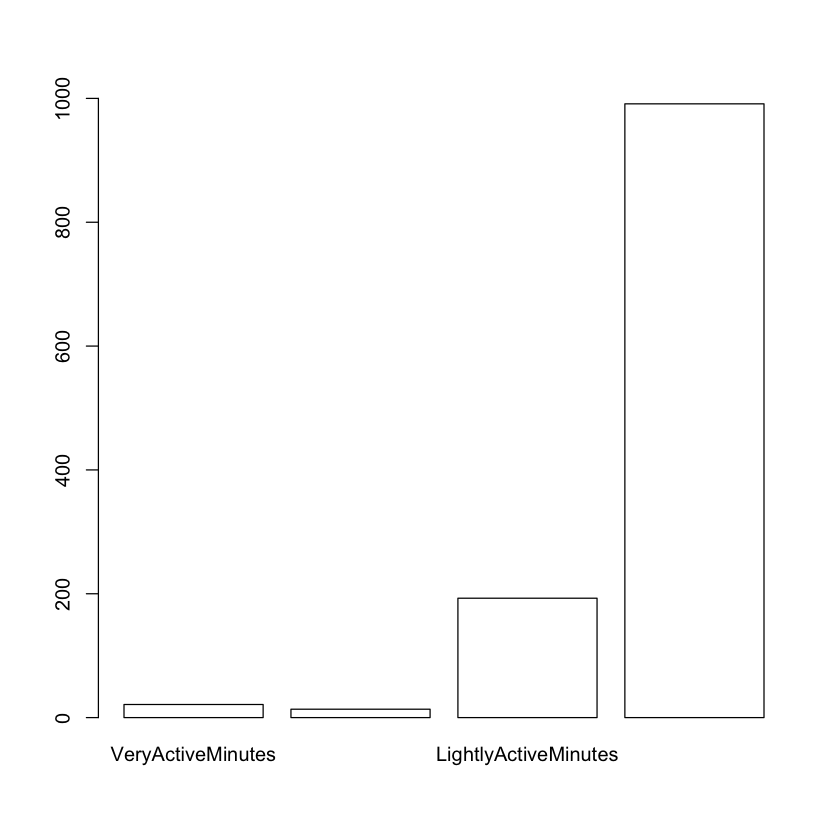

In [353]:
vam <- daily_intensities %>% select(VeryActiveMinutes, FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes)%>%
summarize_all(mean)%>%as.matrix() %>% barplot(col = heat.colors(0),ylim = c(0,1000))


## Conclusión

<ul>
<li>Se estudiaron los dispositivos inteligentes y se recomienda implementar avisos en la aplicación Bellabeat para comunicar, si se está realizando la cantidad de actividad física recomendada, tomando como referencia un artículo de harvard <strong> que indica que al menos se deben hacer 150 minutos de actividad aeróbica moderada a la semana y hacer un promedio de 7500 pasos al día (1)</strong>
    ha sido la <strong>recomendación del gobierno federal desde 2008. (2)</strong></li>
<br>
    

<li>Los dispositivos time y leaf podrían ayudar a ver cual es el tiempo  de sedentarismo que tiene una persona e invitarlos mediante la aplicación a realizar ejercicio ya que a <strong>las personas que no son activas les puede resultar difícil saber exactamente cuánto tiempo han estado moviéndose, Cuantificar el ejercicio contando los pasos puede parecer más factible y menos abrumador (1)</strong></li>
<br>

<li>Se implementaría una función que calcule cuantos minutos de alta actividad, actividad moderada, actividad baja y actividad de sedentarismo y después se calcularía una operación de correlacion con el número de calorias quemadas para que el usuario pueda ver la relación de calorías quemadas formulando un plan personal</li>
<br>
<li>También se recomienda hacer una función que calcule el tiempo promedio que se esta en la cama y el tiempo promedio que se duerme para despues calcular las horas promedio que se pasan en la cama sin dormir.</li>
<br>

1. https://www.health.harvard.edu/blog/10000-steps-a-day-or-fewer-2019071117305
2. https://health.gov/our-work/nutrition-physical-activity/presidents-council
</ul>